In [39]:
# Nice Visualizations...


hist> op <- par(mfrow = c(2, 2))

hist> hist(islands)

hist> utils::str(hist(islands, col = "gray", labels = TRUE))
List of 6
 $ breaks  : num [1:10] 0 2000 4000 6000 8000 10000 12000 14000 16000 18000
 $ counts  : int [1:9] 41 2 1 1 1 1 0 0 1
 $ density : num [1:9] 4.27e-04 2.08e-05 1.04e-05 1.04e-05 1.04e-05 ...
 $ mids    : num [1:9] 1000 3000 5000 7000 9000 11000 13000 15000 17000
 $ xname   : chr "islands"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"

hist> hist(sqrt(islands), breaks = 12, col = "lightblue", border = "pink")

hist> ##-- For non-equidistant breaks, counts should NOT be graphed unscaled:
hist> r <- hist(sqrt(islands), breaks = c(4*0:5, 10*3:5, 70, 100, 140),
hist+           col = "blue1")

hist> text(r$mids, r$density, r$counts, adj = c(.5, -.5), col = "blue3")

hist> sapply(r[2:3], sum)
   counts   density 
48.000000  0.215625 

hist> sum(r$density * diff(r$breaks)) # == 1
[1] 1

hist> lines(r, lty = 3, border = "purple") # -> lines.histogram(*)

hi

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"

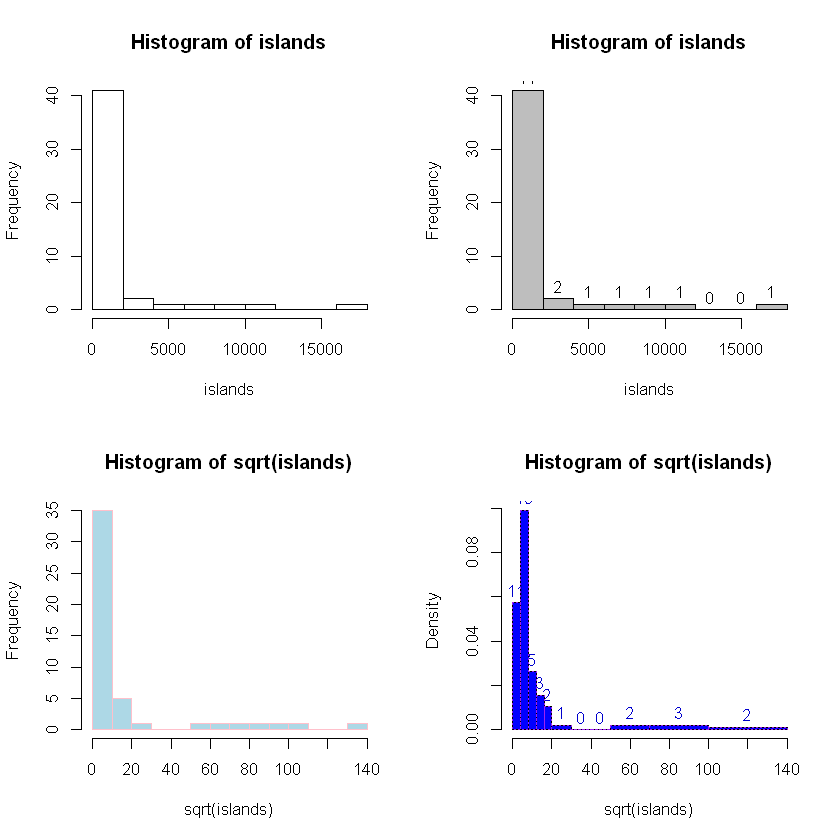


hist> ## No test: ##D 
hist> ##D ## Extreme outliers; the "FD" rule would take very large number of 'breaks':
hist> ##D XXL <- c(1:9, c(-1,1)*1e300)
hist> ##D hh <- hist(XXL, "FD") # did not work in R <= 3.4.1; now gives warning
hist> ##D ## pretty() determines how many counts are used (platform dependently!):
hist> ##D length(hh$breaks) ## typically 1 million -- though 1e6 was "a suggestion only"
hist> ## End(No test)
hist> require(stats)

hist> set.seed(14)

hist> x <- rchisq(100, df = 4)

hist> ## Don't show: 
hist> op <- par(mfrow = 2:1, mgp = c(1.5, 0.6, 0), mar = .1 + c(3,3:1))

hist> ## End(Don't show)
hist> ## Comparing data with a model distribution should be done with qqplot()!
hist> qqplot(x, qchisq(ppoints(x), df = 4)); abline(0, 1, col = 2, lty = 2)

hist> ## if you really insist on using hist() ... :
hist> hist(x, freq = FALSE, ylim = c(0, 0.2))


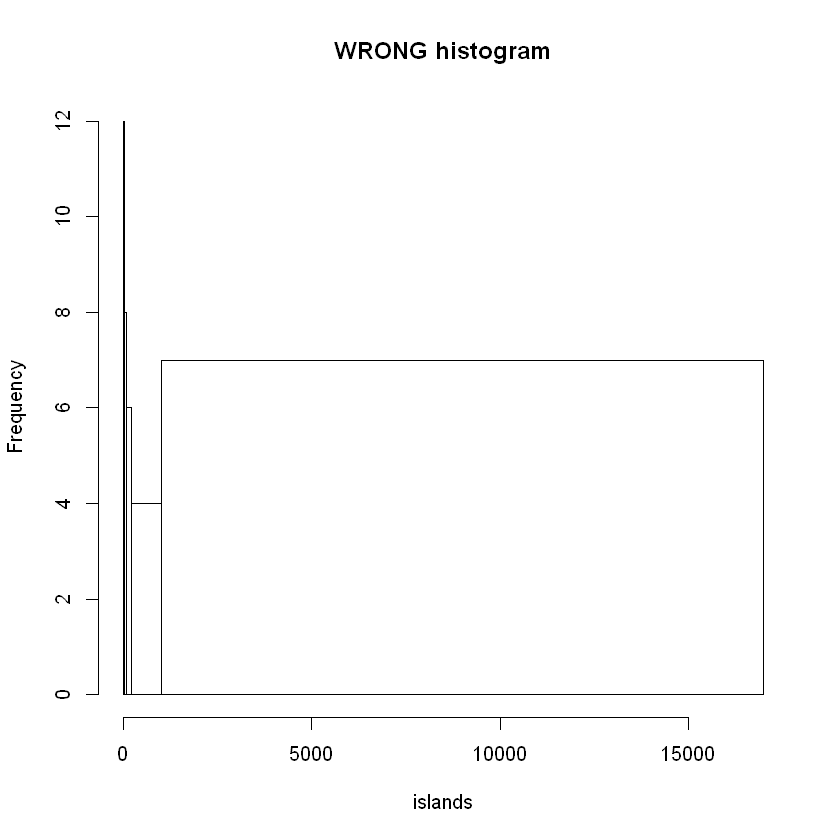


hist> curve(dchisq(x, df = 4), col = 2, lty = 2, lwd = 2, add = TRUE)

hist> ## Don't show: 
hist> par(op)

hist> ## End(Don't show)
hist> 
hist> 
hist> 


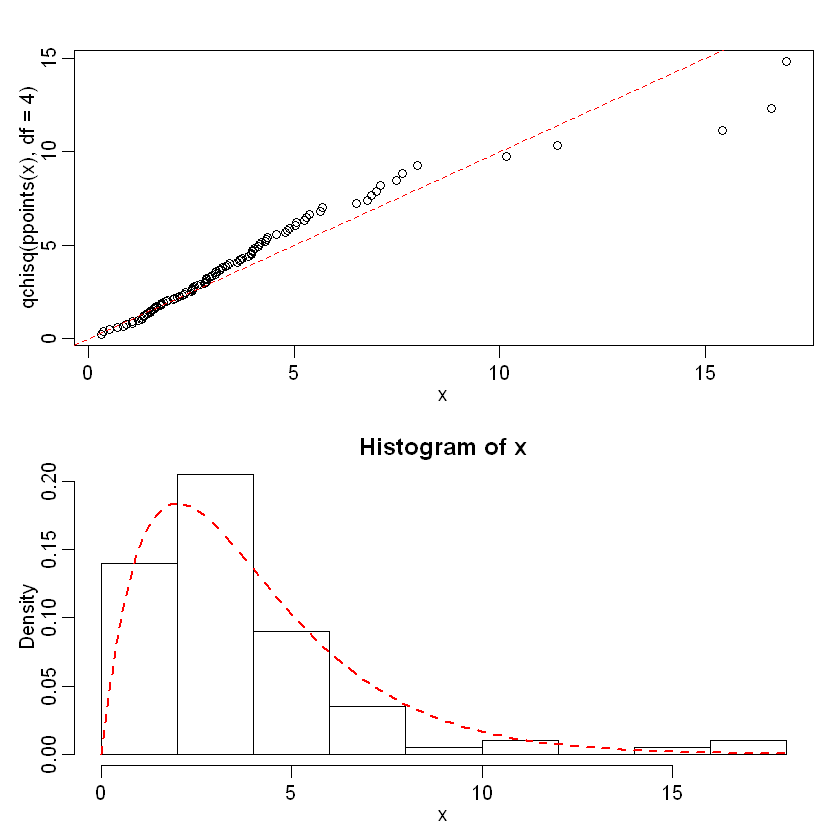

In [38]:
example(hist)

# R Data Types - it's all about vectors...

In [36]:
myvector <- 10:30
myvector

[1] 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30

In [37]:
# This is also a vector...
v1 <- 10
v1

[1] 10

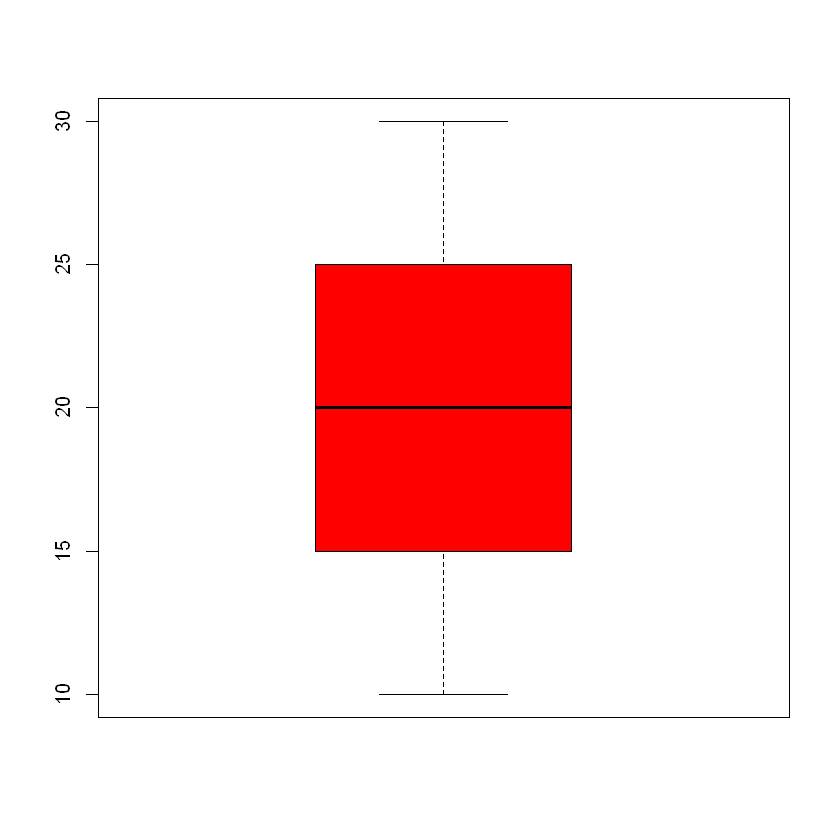

In [43]:
boxplot(myvector,col='red')

## Matrix - a two dimensional array

In [44]:
mymat = matrix(c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15),nrow=3)
mymat

1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [45]:
mymat[2,3]
mymat[,3]
mymat[3,]

[1] 8

[1] 7 8 9

[1]  3  6  9 12 15

# Array - 3 or more dimensions...

In [47]:
myarray <- array(1:24, dim=c(3,4,2))
print(myarray)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

, , 2

     [,1] [,2] [,3] [,4]
[1,]   13   16   19   22
[2,]   14   17   20   23
[3,]   15   18   21   24



## End of Topic

# Using Data Frames...

In [3]:
# Creating a data.frame explicitly...
state_code = c("CT", "ME", "MA", "NH", "RI", "VT")
population <- c(3576452, 1331479, 6811779, 1334795, 1056426, 624594 )
houseseats <- c(5, 2, 9, 2, 2, 1)

In [4]:
ne_state_data <- data.frame(state_code,population, houseseats, stringsAsFactors = FALSE)
ne_state_data

state_code,population,houseseats
CT,3576452,5
ME,1331479,2
MA,6811779,9
NH,1334795,2
RI,1056426,2
VT,624594,1


In [5]:
ne_state_data$state_code

[1] "CT" "ME" "MA" "NH" "RI" "VT"

In [6]:
# Confirm the data file path is correct?
getwd()

[1] "C:/Users/brcaffer/Documents/GitHub/Professional/Documents/GitHub-Presentations/DataScienceFromAtoZ/Lab"

In [48]:
# Creating a data.frame implicitly...
salesdata <- read.csv("../data/sales.csv",header=T,sep=",",stringsAsFactors = FALSE)
salesdata

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,100000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


In [49]:
# What class is this?
class(salesdata)

[1] "data.frame"

In [50]:
# Get information about the data.frame...
str(salesdata)

'data.frame':	5 obs. of  6 variables:
 $ SalesPersonID: int  6 7 8 9 10
 $ FirstName    : chr  "Tom" "Betty" "Joe" "Mary" ...
 $ LastName     : chr  "Smith" "Lucination" "Fits" "Attricks" ...
 $ TotalSales   : int  100000 120 110 2500 1300
 $ AsOfDate     : chr  "2014-03-27" "2014-03-27" "2014-03-27" "2014-03-27" ...
 $ SentDate     : chr  "2014-07-08" "2014-07-08" "2014-07-08" "2014-07-08" ...


In [10]:
# Just show the first few rows...
head(salesdata)
tail(salesdata)

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,100000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,100000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


In [11]:
dim(salesdata)

[1] 5 6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     120    1300   20806    2500  100000 

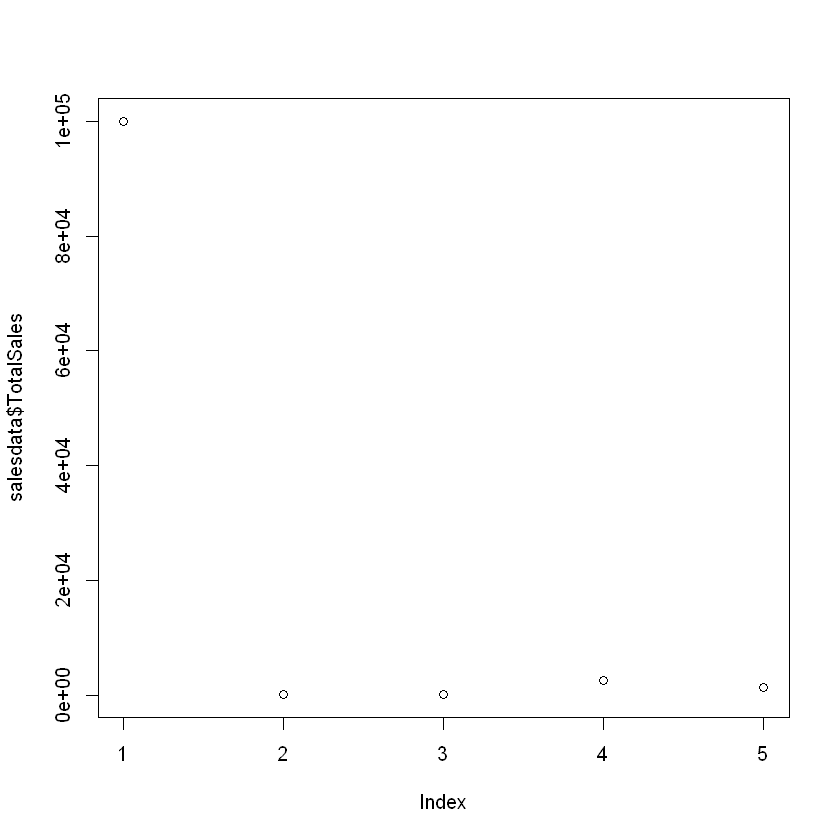

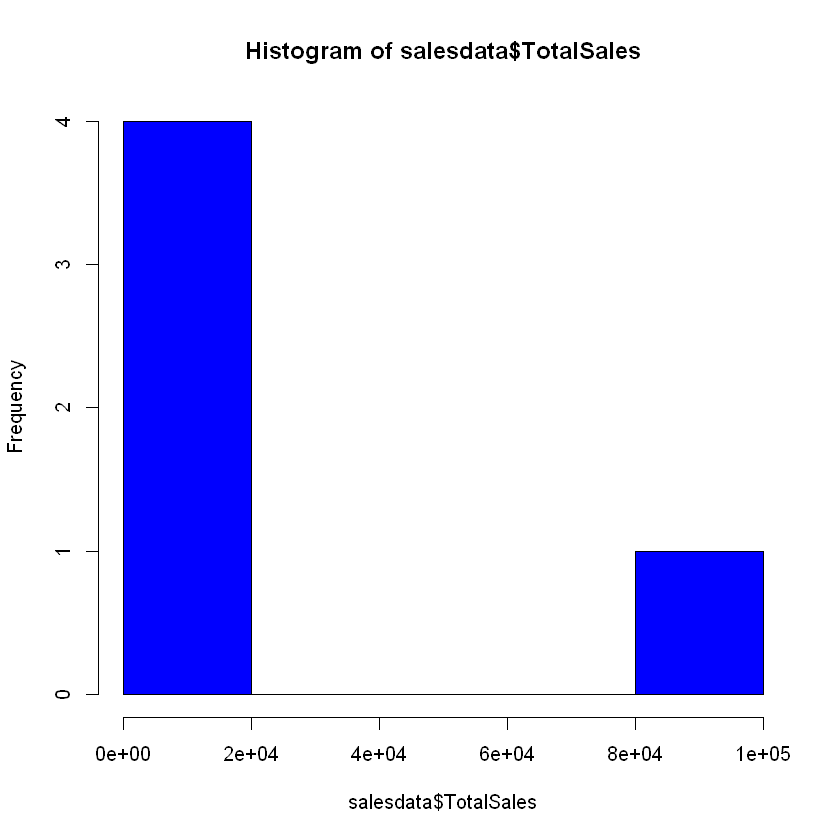

In [12]:
summary(salesdata$TotalSales)
plot(salesdata$TotalSales)
hist(salesdata$TotalSales, col = 'blue')

#  Slicing & Filtering

In [15]:
# Column slicing...
salesdata["TotalSales"]

TotalSales
100000
120
110
2500
1300


In [16]:
salesdata[,"TotalSales"]

[1] 100000    120    110   2500   1300

In [13]:
salesdata[1]

SalesPersonID
6
7
8
9
10


### Row Slicing...

In [17]:
salesdata[c("LastName", "TotalSales")]

LastName,TotalSales
Smith,100000
Lucination,120
Fits,110
Attricks,2500
Day,1300


In [18]:
salesdata[,2]
salesdata[1:3,]

[1] "Tom"   "Betty" "Joe"   "Mary"  "Holly"

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,100000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08


In [21]:
# As we have seen, we can filter on rows...
salesdata[salesdata$TotalSales > 120,]

,SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
1,6,Tom,Smith,100000,2014-03-27,2014-07-08
4,9,Mary,Attricks,2500,2014-03-27,2014-07-08
5,10,Holly,Day,1300,2014-03-27,2014-07-08


# Data Frame Shaping... 

In [23]:
salesdata <- read.csv("../data/sales.csv",header=T,sep=",", stringsAsFactors = FALSE)
salesdata

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,100000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


In [25]:
# Make referencing columns easier...
attach(salesdata)

In [27]:
TotalSales
mean(TotalSales)

[1] 100000    120    110   2500   1300

[1] 20806

In [26]:
# Updating a value...
salesdata[SalesPersonID == 6, 'TotalSales'] <- 2000
salesdata[SalesPersonID == 6, 'TotalSales'] 

[1] 2000

In [28]:
# Adding a new column to a data.frame...
salesdata$TaxAmount = salesdata$TotalSales * .07  # 7 % tax rate
salesdata

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate,TaxAmount
6,Tom,Smith,2000,2014-03-27,2014-07-08,140.0
7,Betty,Lucination,120,2014-03-27,2014-07-08,8.4
8,Joe,Fits,110,2014-03-27,2014-07-08,7.7
9,Mary,Attricks,2500,2014-03-27,2014-07-08,175.0
10,Holly,Day,1300,2014-03-27,2014-07-08,91.0


In [29]:
# Removing a column...
salesdata$TaxAmount = NULL
salesdata

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,2000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


In [30]:
# Adding rows to a data.frame...
salesdata <- rbind(salesdata, list(30, 'Sal', 'Amanda', 3000, '3/27/2014', '7/8/2014'))
salesdata

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,2000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08
30,Sal,Amanda,3000,3/27/2014,7/8/2014


In [31]:
# Removing a row...
salesdata[-6,]

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,Tom,Smith,2000,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08


In [32]:
#  Sorting...
salesdata[order(salesdata$LastName, salesdata$FirstName),]

,SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,30,Sal,Amanda,3000,3/27/2014,7/8/2014
4,9,Mary,Attricks,2500,2014-03-27,2014-07-08
5,10,Holly,Day,1300,2014-03-27,2014-07-08
3,8,Joe,Fits,110,2014-03-27,2014-07-08
2,7,Betty,Lucination,120,2014-03-27,2014-07-08
1,6,Tom,Smith,2000,2014-03-27,2014-07-08


In [33]:
# Using with...
#   with eliminates the need to prefix each column
#   with the data.frame name just for the function.
salesdata[with(salesdata, order(LastName, FirstName)), ]

,SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
6,30,Sal,Amanda,3000,3/27/2014,7/8/2014
4,9,Mary,Attricks,2500,2014-03-27,2014-07-08
5,10,Holly,Day,1300,2014-03-27,2014-07-08
3,8,Joe,Fits,110,2014-03-27,2014-07-08
2,7,Betty,Lucination,120,2014-03-27,2014-07-08
1,6,Tom,Smith,2000,2014-03-27,2014-07-08


In [51]:
install.packages('sqldf')

Installing package into 'C:/Users/brcaffer/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [53]:
library('sqldf')

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [54]:
sqldf('select * from salesdata order by Lastname')

SalesPersonID,FirstName,LastName,TotalSales,AsOfDate,SentDate
9,Mary,Attricks,2500,2014-03-27,2014-07-08
10,Holly,Day,1300,2014-03-27,2014-07-08
8,Joe,Fits,110,2014-03-27,2014-07-08
7,Betty,Lucination,120,2014-03-27,2014-07-08
6,Tom,Smith,100000,2014-03-27,2014-07-08


In [56]:
mynewdf <- sqldf('select FirstName, LastName from salesdata where totalsales > 200')

In [57]:
print(mynewdf)

  FirstName LastName
1       Tom    Smith
2      Mary Attricks
3     Holly      Day
